Mengakses file dan direktori yang ada di Google Drive dari Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Library**

Impor beberapa library Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from matplotlib.colors import LinearSegmentedColormap

# **Dataset**

## **Load Data**

Baca dataset dari file CSV dan simpan ke dalam DataFrame.

In [3]:
courses_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/courses.csv')
assessments_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/assessments.csv')
vle_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/vle.csv')
student_info_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentInfo.csv')
student_registration_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentRegistration.csv')
student_assessment_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentAssessment.csv')
student_vle_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentVle.csv')

# **Courses**

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari dataset courses_df untuk melihat sampel data.

In [4]:
courses_df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Menampilkan beberapa baris terakhir dari dataset courses_df.

In [5]:
courses_df.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.



1. Dataset ini terdiri dari 22 baris (entries) dan 3 kolom (columns).
2. Nama kolom dan tipe data masing-masing kolom adalah sebagai berikut:

   *   code_module (object)
   *   code_presentation (object)
   *   module_presentation_length (int64)

3. Tidak ada nilai yang kosong (null) dalam ketiga kolom tersebut, karena semua kolom memiliki "Non-Null Count" sebanyak 22, yang sesuai dengan jumlah baris dalam dataset.

4. Dataset ini menggunakan sekitar 656.0+ bytes dalam memori.

In [6]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [7]:
courses_df.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

Menampilkan statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk kolom numerik.

In [8]:
courses_df.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

 Tidak ada nilai null dalam dataset courses.csv, yang berarti dataset ini tidak memiliki nilai yang kosong dalam ketiga kolom tersebut.



In [9]:
courses_df.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

Tidak ada baris yang duplikat dalam dataset courses.csv. Jumlah baris yang duplikat adalah 0. Ini menunjukkan bahwa setiap baris dalam dataset ini adalah unik, dan tidak ada duplikasi data.

In [10]:
courses_df.duplicated().sum()

0

# **Assessments**

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari dataset assessments_df untuk melihat sampel data.

In [11]:
assessments_df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Menampilkan beberapa baris terakhir dari dataset assessments_df.

In [12]:
assessments_df.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.



1. Dataset ini terdiri dari 206 baris (entries) dan 6 kolom (columns).
2. Nama kolom dan tipe data masing-masing kolom adalah sebagai berikut:

   *   code_module (object)
   *   code_presentation (object)
   *   id_assessment (int64)
   *   assessment_type (object)
   *   date (float64)
   *   weight (float64)

3. Kolom date memiliki 195 nilai non-null, yang berarti terdapat beberapa nilai yang kosong (NaN) dalam kolom ini.

4. Dataset ini menggunakan sekitar 9.8+ KB dalam memori.

In [13]:
assessments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [14]:
assessments_df.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

Menampilkan statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk kolom numerik.

In [15]:
assessments_df.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

Dalam dataset assessments.csv, terdapat nilai null pada kolom date, dengan jumlah sebanyak 11 nilai null.

In [16]:
assessments_df.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

Tidak ada baris yang duplikat dalam dataset assessments.csv. Jumlah baris yang duplikat adalah 0. Ini menunjukkan bahwa setiap baris dalam dataset ini adalah unik, dan tidak ada duplikasi data.

In [17]:
assessments_df.duplicated().sum()

0

## **Pre Processing**

### **Data Cleaning**

Menghapus data yang hilang berarti kehilangan informasi yang mungkin berharga. Data yang hilang bisa saja berisi informasi penting atau memiliki dampak pada analisis atau pemodelan yang akan dilakukan. Mengisi data dengan mode, median, dan mean memungkinkan untuk mempertahankan sebagian besar informasi asli dalam kumpulan data.

Menemukan nilai yang paling sering muncul (mode) dalam kolom 'date' dan mengisi nilai-nilai yang hilang dengan mode tersebut.

Nilai mode (nilai paling sering muncul) dalam kolom "date" pada dataset vle.csv adalah 222.0.

In [18]:
date = assessments_df['date'].mode()[0]
date

222.0

Mengisi nilai yang kosong (NaN) dalam kolom "date" pada dataset assessments.csv dengan nilai mode sebelumnya, yaitu 222.0.

In [19]:
assessments_df['date'].fillna(date, inplace=True)

Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset setelah dilakukan penanganan.

In [20]:
assessments_df.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

# **VLE**

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari dataset vle_df untuk melihat sampel data.

In [21]:
vle_df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


Menampilkan beberapa baris terakhir dari dataset vle_df.

In [22]:
vle_df.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.



1. Dataset ini terdiri dari 6364 baris (entries) dan 6 kolom (columns).
2. Nama kolom dan tipe data masing-masing kolom adalah sebagai berikut:

   *   id_site (int64)
   *   code_module (object)
   *   code_presentation (object)
   *   activity_type (object)
   *   week_from (float64)
   *   week_to (float64)

3. Kolom week_from dan week_t memiliki 1121 nilai non-null, yang berarti terdapat beberapa nilai yang kosong (NaN) dalam kolom ini.

4. Dataset ini menggunakan sekitar 298.4+ KB dalam memori.

In [23]:
vle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [24]:
vle_df.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

Menampilkan statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk kolom numerik.

In [25]:
vle_df.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

Dalam dataset vle.csv, terdapat nilai null pada kolom week_from dan week_to, dengan jumlah sebanyak 5243 nilai null.

In [26]:
vle_df.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

Tidak ada baris yang duplikat dalam dataset vle.csv. Jumlah baris yang duplikat adalah 0. Ini menunjukkan bahwa setiap baris dalam dataset ini adalah unik, dan tidak ada duplikasi data.

In [27]:
vle_df.duplicated().sum()

0

## **Pre Processing**

### **Data Cleaning**

Menghapus data yang hilang berarti kehilangan informasi yang mungkin berharga. Data yang hilang bisa saja berisi informasi penting atau memiliki dampak pada analisis atau pemodelan yang akan dilakukan. Mengisi data dengan mode, median, dan mean memungkinkan untuk mempertahankan sebagian besar informasi asli dalam kumpulan data.

Menemukan nilai yang paling sering muncul (mode) dalam kolom 'week_from' dan 'week_to', lalu mengisi nilai-nilai yang hilang dengan mode tersebut.

Nilai mode (nilai paling sering muncul) dalam kolom "week_from" pada dataset vle.csv adalah 18.0.

In [28]:
week_from = vle_df['week_from'].mode()[0]
week_from

18.0

Mengisi nilai yang kosong (NaN) dalam kolom "week_from" pada dataset vle.csv dengan nilai mode sebelumnya, yaitu 18.0.

In [29]:
vle_df['week_from'].fillna(week_from, inplace=True)

Nilai mode (nilai paling sering muncul) dalam kolom "week_to" pada dataset vle.csv adalah 18.0.

In [30]:
week_to = vle_df['week_to'].mode()[0]
week_to

18.0

Mengisi nilai yang kosong (NaN) dalam kolom "week_to" pada dataset vle.csv dengan nilai mode sebelumnya, yaitu 18.0.

In [31]:
vle_df['week_to'].fillna(week_to, inplace=True)

Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset setelah dilakukan penanganan.

In [32]:
vle_df.isna().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

# **Student Info**

## **EDA (Exploratory Data Analysis)**

Menampilkan 5 baris pertama dari DataFrame student_info_df untuk melihat sampel data awal.

In [33]:
student_info_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


Menampilkan 5 baris terakhir dari DataFrame student_info_df untuk melihat sampel data akhir.

In [34]:
student_info_df.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.



1. Dataset ini terdiri dari 32,593 baris (entries) dan 12 kolom (columns).
2. Nama kolom dan tipe data masing-masing kolom adalah sebagai berikut:

   *   code_module (object)
   *   code_presentation (object)
   *   id_student (int64)
   *   gender (object)
   *   region (object)
   *   highest_education (object)
   *   imd_band (object)
   *   age_band (object)
   *   num_of_prev_attempts (int64)
   *   studied_credits (int64)
   *   disability (object)
   *   final_result (object)

3. Kolom imd_band memiliki beberapa nilai yang kosong (null), sebanyak 31482 nilai kosong.

4. Dataset ini menggunakan sekitar 3.0+ MB dalam memori.


In [35]:
student_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [36]:
student_info_df.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

Menampilkan statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk kolom numerik.

In [37]:
student_info_df.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

Dalam dataset studentInfo.csv, terdapat nilai null pada kolom imd_band, dengan jumlah sebanyak 1111 nilai null.

In [38]:
student_info_df.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

Tidak ada baris yang duplikat dalam dataset studentInfo.csv. Jumlah baris yang duplikat adalah 0. Ini menunjukkan bahwa setiap baris dalam dataset ini adalah unik, dan tidak ada duplikasi data.

In [39]:
student_info_df.duplicated().sum()

0

## **Pre Processing**

### **Data Cleaning**

Menghapus data yang hilang berarti kehilangan informasi yang mungkin berharga. Data yang hilang bisa saja berisi informasi penting atau memiliki dampak pada analisis atau pemodelan yang akan dilakukan. Mengisi data dengan mode, median, dan mean memungkinkan untuk mempertahankan sebagian besar informasi asli dalam kumpulan data.

Menemukan modus 'imd_band' dan mengisinya ke dalam nilai yang hilang dalam kolom tersebut.

Nilai mode (nilai paling sering muncul) dalam kolom "imd_band" pada dataset vle.csv adalah 20-30%.

In [40]:
imd_band = student_info_df['imd_band'].mode()[0]
imd_band

'20-30%'

Menggunakan fillna untuk mengisi nilai yang hilang dengan modus.

Mengisi nilai yang kosong (NaN) dalam kolom "imd_band" pada dataset studentInfo.csv dengan nilai mode sebelumnya, yaitu 20-30%.

In [41]:
student_info_df['imd_band'].fillna(imd_band, inplace=True)

Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset setelah dilakukan penanganan.

In [42]:
student_info_df.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

# **Student Registration**

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari dataset student_registration_df untuk melihat sampel data awal.

In [43]:
student_registration_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


Menampilkan beberapa baris terakhir dari dataset student_registration_df untuk melihat sampel data akhir.

In [44]:
student_registration_df.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


 Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.



1. Dataset ini terdiri dari 32593 baris (entries) dan 5 kolom (columns).
2. Nama kolom dan tipe data masing-masing kolom adalah sebagai berikut:

   *   code_module (object)
   *   code_presentation (object)
   *   id_student (int64)
   *   date_registration (float64)
   *   date_unregistration (float64)

3. Kolom date_unregistration memiliki 10072 nilai non-null, yang berarti terdapat beberapa nilai yang kosong (NaN) dalam kolom ini.

4. Dataset ini menggunakan sekitar 1.2+ MB dalam memori.

In [45]:
student_registration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [46]:
student_registration_df.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

Menampilkan statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk kolom numerik.

In [47]:
student_registration_df.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

Dalam dataset studentRegistration.csv, terdapat nilai null pada kolom date_registration, dengan jumlah sebanyak 45 nilai null dan kolom date_unregistration sebanyak 22521 nilai null.

In [48]:
student_registration_df.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

Tidak ada baris yang duplikat dalam dataset studentRegistration.csv. Jumlah baris yang duplikat adalah 0. Ini menunjukkan bahwa setiap baris dalam dataset ini adalah unik, dan tidak ada duplikasi data.

In [49]:
student_registration_df.duplicated().sum()

0

## **Pre Processing**

### **Data Cleaning**

Menghapus data yang hilang berarti kehilangan informasi yang mungkin berharga. Data yang hilang bisa saja berisi informasi penting atau memiliki dampak pada analisis atau pemodelan yang akan dilakukan. Mengisi data dengan mode, median, dan mean memungkinkan untuk mempertahankan sebagian besar informasi asli dalam kumpulan data.

Menemukan nilai yang paling sering muncul (mode) dalam kolom 'date_registration' dan mengisi nilai-nilai yang hilang dengan mode tersebut.

Nilai mode (nilai paling sering muncul) dalam kolom "date_registration" pada dataset vle.csv adalah -22.0.

In [50]:
date_registration = student_registration_df['date_registration'].mode()[0]
date_registration

-22.0

Mengisi nilai yang kosong (NaN) dalam kolom "date_registration" pada dataset studentRegistration.csv dengan nilai mode sebelumnya, yaitu -22.0.

In [51]:
student_registration_df['date_registration'].fillna(date_registration, inplace=True)

Nilai mode (nilai paling sering muncul) dalam kolom "date_unregistration" pada dataset vle.csv adalah 12.0.

In [52]:
date_unregistration = student_registration_df['date_unregistration'].mode()[0]
date_unregistration

12.0

Mengisi nilai yang kosong (NaN) dalam kolom "date_unregistration" pada dataset studentRegistration.csv dengan nilai mode sebelumnya, yaitu 12.0.

In [53]:
student_registration_df['date_unregistration'].fillna(date_unregistration, inplace=True)

Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset setelah dilakukan penanganan.

In [54]:
vle_df.isna().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

# **Student Assessment**

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari dataset student_assessment_df untuk melihat sampel data awal.

In [55]:
student_assessment_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Menampilkan beberapa baris terakhir dari dataset student_assessment_df untuk melihat sampel data akhir.

In [56]:
student_assessment_df.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.



1. Dataset ini terdiri dari 173912 baris (entries) dan 5 kolom (columns).
2. Nama kolom dan tipe data masing-masing kolom adalah sebagai berikut:

   *   id_assessment (int64)
   *   id_student (int64)
   *   date_submitted (int64)
   *   is_banked (int64)
   *   score (float64)

3. Kolom score memiliki 173739 nilai non-null, yang berarti terdapat beberapa nilai yang kosong (NaN) dalam kolom ini.

4. Dataset ini menggunakan sekitar 6.6 MB dalam memori.

In [57]:
student_assessment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [58]:
student_assessment_df.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

Menampilkan statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk kolom numerik.

In [59]:
student_assessment_df.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

Dalam dataset studentAssessment.csv, terdapat nilai null pada kolom score, dengan jumlah sebanyak 173 nilai null.

In [60]:
student_assessment_df.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

Tidak ada baris yang duplikat dalam dataset studentAssessment.csv. Jumlah baris yang duplikat adalah 0. Ini menunjukkan bahwa setiap baris dalam dataset ini adalah unik, dan tidak ada duplikasi data.

In [61]:
student_assessment_df.duplicated().sum()

0

## **Pre Processing**

### **Data Cleaning**

Menghapus data yang hilang berarti kehilangan informasi yang mungkin berharga. Data yang hilang bisa saja berisi informasi penting atau memiliki dampak pada analisis atau pemodelan yang akan dilakukan. Mengisi data dengan mode, median, dan mean memungkinkan untuk mempertahankan sebagian besar informasi asli dalam kumpulan data.

Mengisi nilai-nilai yang hilang dalam kolom 'score' dengan rata-rata dari kolom tersebut.

Nilai moan (nilai rata-rata) dalam kolom "score" pada dataset studentAssessment.csv adalah 75.7995729226023.

In [62]:
score = student_assessment_df['score'].mean()
score

75.7995729226023

Mengisi nilai yang kosong (NaN) dalam kolom "score" pada dataset studentAssessment.csv dengan nilai mean sebelumnya, yaitu 75.7995729226023.

In [63]:
student_assessment_df['score'].fillna(score, inplace=True)

Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset setelah dilakukan penanganan.

In [64]:
student_assessment_df.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

# **Student VLE**

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari dataset student_vle_df untuk melihat sampel data awal.

In [65]:
student_vle_df.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


Menampilkan beberapa baris terakhir dari dataset student_vle_df untuk melihat sampel data akhir.

In [66]:
student_vle_df.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.



1. Dataset ini terdiri dari 10655280 baris (entries) dan 6 kolom (columns).
2. Nama kolom dan tipe data masing-masing kolom adalah sebagai berikut:

   *   code_module (object)
   *   code_presentation (object)
   *   id_student (int64)
   *   id_site (int64)
   *   date (int64)
   *   sum_click (int64)

3. Dataset ini menggunakan sekitar 487.8+ MB dalam memori.

In [67]:
student_vle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [68]:
student_vle_df.nunique()

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

Menampilkan statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) untuk kolom numerik.

In [69]:
student_vle_df.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

 Tidak ada nilai null dalam dataset studentVle.csv, yang berarti dataset ini tidak memiliki nilai yang kosong dalam ketiga kolom tersebut.

In [70]:
student_vle_df.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

Terdapat baris yang duplikat dalam dataset studentVle.csv. Jumlah baris yang duplikat adalah 787170.

In [71]:
student_vle_df.duplicated().sum()

787170

## **Pre Processing**

### **Data Cleaning**

Data duplikat mengandung informasi yang sama persis, yang bisa menjadi redundan, sehingga menghapus duplikat dapat membuat proses pengolahan data lebih efisien.

Menghapus baris yang duplikat dalam dataset.

In [72]:
student_vle_df.drop_duplicates(inplace=True)

Menghitung jumlah baris yang duplikat setelah penghapusan.

In [73]:
student_vle_df.duplicated().sum()

0

# **Analisis rata-rata skor berdasarkan tipe penilaian**

## **Integrasi Data**

Menggabungkan dua DataFrames, yaitu assessments_df dan student_assessment_df, berdasarkan kolom 'id_assessment'.

In [74]:
merged_df = pd.merge(assessments_df, student_assessment_df, on='id_assessment')

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari DataFrame merged_df untuk melihat sampel data awal.

In [75]:
merged_df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


Menampilkan beberapa baris terakhir dari DataFrame merged_df untuk melihat sampel data akhir.

In [76]:
merged_df.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0
173911,GGG,2014J,37437,TMA,173.0,0.0,653374,172,0,50.0


## **Analisis**

Melakukan visualisasi distribusi jenis penilaian (assessment_type) dalam penggabungan dataset assessments.csv dan studentAssessment.csv.

In [77]:
sns.set(style="whitegrid")

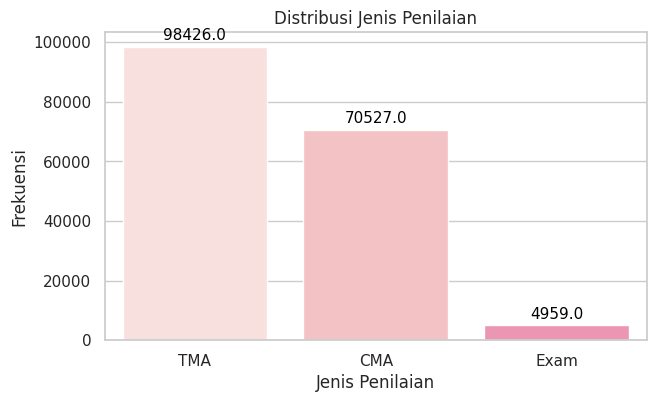

In [78]:
plt.figure(figsize=(7, 4))
sns.set_palette('RdPu')
sns.countplot(data=merged_df, x='assessment_type')
plt.xlabel('Jenis Penilaian')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jenis Penilaian')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


Hasilnya adalah sebagai berikut:
*   Jumlah TMA (Tutor Marked Assessment) adalah 98,426.
*   Jumlah CMA (Computer Marked Assessment) adalah 70,527.
*   Jumlah Exam (Final Exam) adalah 4,959.



Visualisasi ini memberikan gambaran tentang sebaran jenis-jenis penilaian dalam dataset, dengan TMA memiliki jumlah tertinggi, diikuti oleh CMA dan Exam. Distribusi ini dapat menjadi informasi penting dalam menganalisis data penilaian mahasiswa.



---



Membuat grafik pie yang menggambarkan proporsi bobot pada penilaian (assessment) berdasarkan jenis penilaian (assessment_type).

In [79]:
def create_pie_chart(data, title):
    total_weight = data.groupby('weight')['id_assessment'].count()

    colors = LinearSegmentedColormap.from_list('gradasi', ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'], N=len(total_weight))

    plt.figure(figsize=(7, 7))
    plt.pie(total_weight, labels=total_weight.index, autopct='%1.1f%%', colors=colors(range(len(total_weight))))
    plt.title(title)
    plt.show()

In [80]:
def pie_chart_by_assessment_type(merged_data, assessment_type):
    filtered_data = merged_data[merged_data['assessment_type'] == assessment_type]

    title = f'Proporsi Bobot pada Penilaian {assessment_type}'
    create_pie_chart(filtered_data, title)

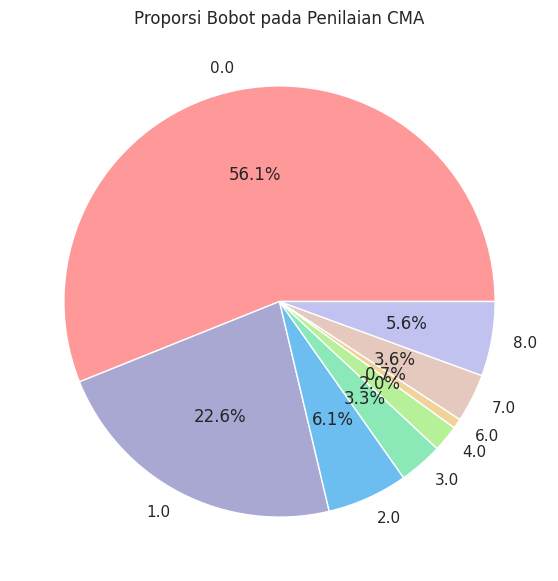

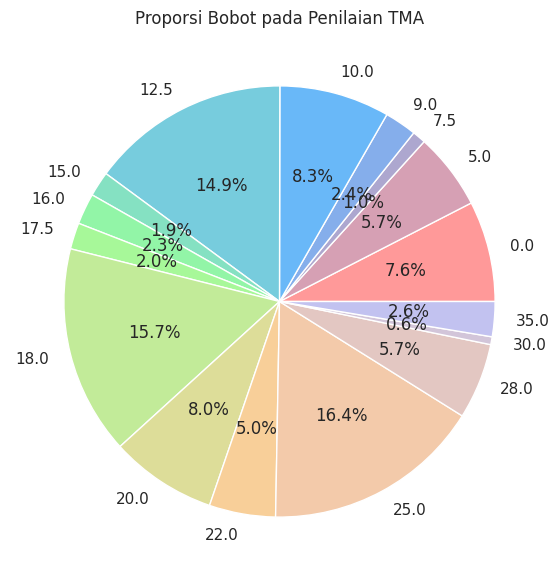

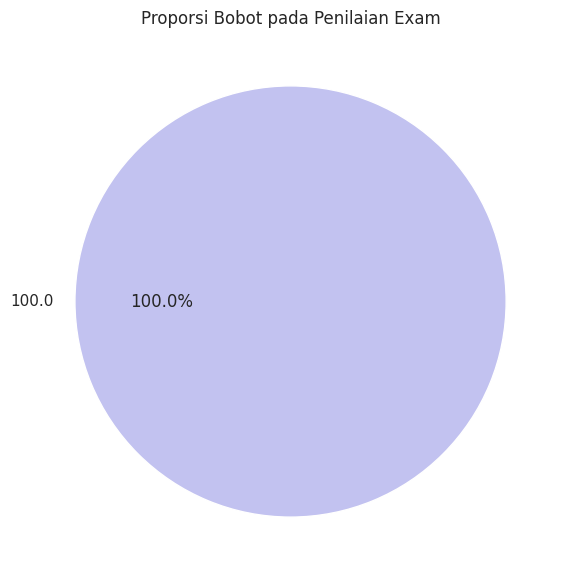

In [81]:
pie_chart_by_assessment_type(merged_df, 'CMA')
pie_chart_by_assessment_type(merged_df, 'TMA')
pie_chart_by_assessment_type(merged_df, 'Exam')

Hasilnya adalah sebagai berikut:

*   Proporsi Bobot pada Penilaian CMA tertinggi adalah 56.1% dengan bobot 0.
*  Proporsi Bobot pada Penilaian TMA tertinggi adalah 16.4% dengan bobot 25.
*   Proporsi Bobot pada Penilaian Exam adalah 100% dengan bobot 100.



Masih terdapat bobot 0 dalam jenis penilaian CMA dan TMA, yang mengindikasikan bahwa ada beberapa penilaian Computer Marked Assessment (CMA) dan Tutor Marked Assessment (TMA) yang memiliki bobot nol dalam dataset. Namun, perlu diingat bahwa penilaian dengan bobot 0 tidak memberikan kontribusi apa pun terhadap penilaian akhir karena mereka tidak memiliki bobot. Oleh karena itu, penilaian dengan bobot 0 dapat dihapus dari dataset untuk meringankan analisis dan pemrosesan lebih lanjut.



---



Membuat DataFrame baru filtered_df yang hanya berisi baris dengan nilai 'weight' yang tidak sama dengan 0.

In [82]:
filtered_df = merged_df[merged_df['weight'] != 0]

Menampilkan beberapa baris pertama dari DataFrame filtered_df untuk melihat sampel data awal.

In [83]:
filtered_df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0




---



Menghitung rata-rata skor berdasarkan tipe penilaian ('assessment_type') menggunakan groupby.

In [84]:
mean_scores_by_type = merged_df.groupby('assessment_type')['score'].mean()

Membuat visualisasi dengan Seaborn yang menunjukkan rata-rata skor berdasarkan tipe penilaian dalam bentuk diagram batang.

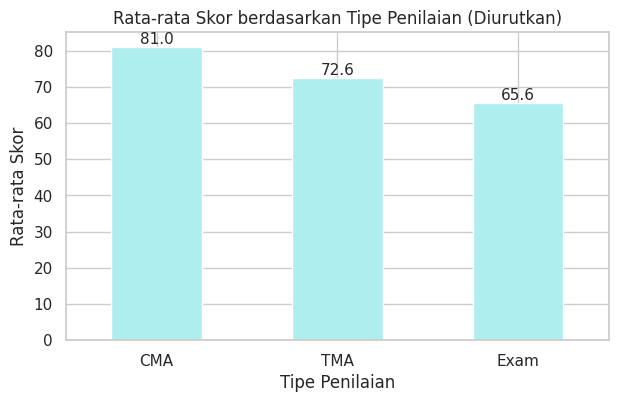

In [85]:
mean_scores_by_type_sorted = mean_scores_by_type.sort_values(ascending=False)

plt.figure(figsize=(7, 4))
mean_scores_by_type_sorted.plot(kind='bar', color='paleturquoise')
plt.title('Rata-rata Skor berdasarkan Tipe Penilaian (Diurutkan)')
plt.xlabel('Tipe Penilaian')
plt.ylabel('Rata-rata Skor')
plt.xticks(rotation=0)

for i, v in enumerate(mean_scores_by_type_sorted):
    plt.text(i, v, '{:.1f}'.format(v), ha='center', va='bottom', fontsize=11)

plt.show()

Keterangan:
*   **Tutor Marked Assessment (TMA):** Penilaian yang dinilai oleh seorang tutor atau instruktur.
*   **Computer Marked Assessment (CMA):** Penilaian yang dinilai secara otomatis oleh komputer.
*   **Final Exam (Exam):** Ujian akhir untuk modul tersebut.

Dalam konteks analisis rata-rata skor berdasarkan tipe penilaian dengan penggabungan dataset assessments.csv dan studentAssessment.csv, dapat disimpulkan bahwa:


*   Tutor Marked Assessment (TMA): Jenis penilaian yang dinilai oleh seorang tutor atau instruktur. Rata-rata skor TMA adalah sekitar 72.6.
*   Computer Marked Assessment (CMA): Jenis penilaian yang dinilai secara otomatis oleh komputer. Rata-rata skor CMA adalah yang tertinggi, yaitu sekitar 81.0.
*   Final Exam (Exam): Ujian akhir untuk modul tersebut. Rata-rata skor Exam adalah yang terendah, yaitu sekitar 65.6.



Dengan demikian, CMA adalah jenis penilaian yang memberikan rata-rata skor tertinggi, sedangkan Exam merupakan jenis penilaian dengan rata-rata skor terendah. Hal ini menunjukkan bahwa penilaian yang dilakukan oleh komputer (CMA) lebih cenderung memberikan hasil yang lebih baik daripada jenis penilaian lainnya.